C:\Users\admin\AppData\Local\Temp\ipykernel_15484\1800104780.py:41: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = dataframe[numeric_columns].apply(lambda x: skew(x.dropna()))


<Figure size 800x600 with 0 Axes>

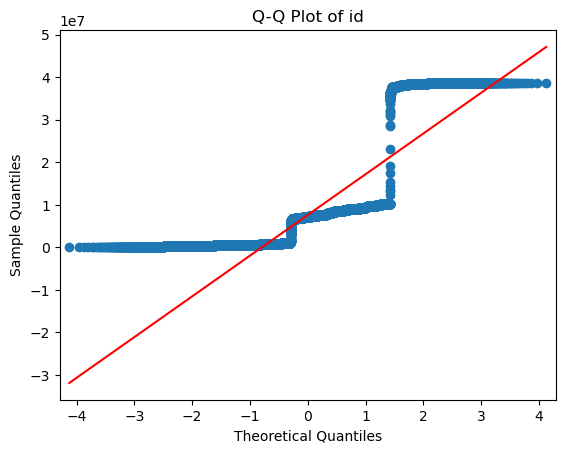

<Figure size 800x600 with 0 Axes>

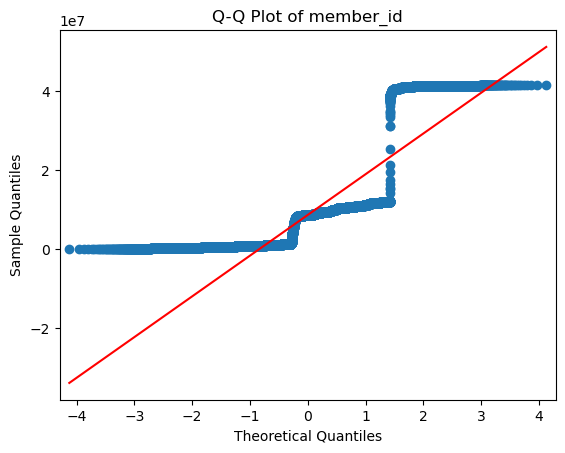

<Figure size 800x600 with 0 Axes>

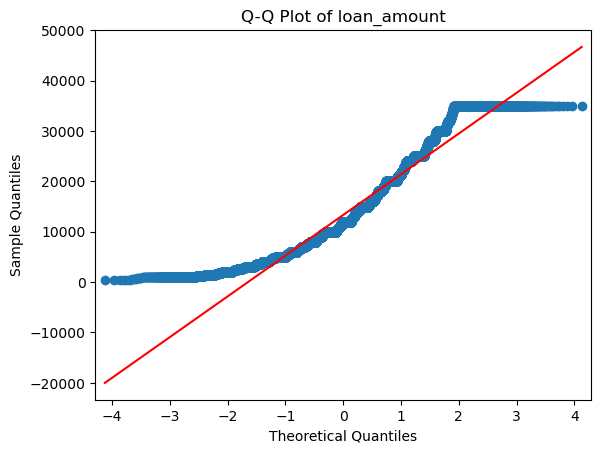

<Figure size 800x600 with 0 Axes>

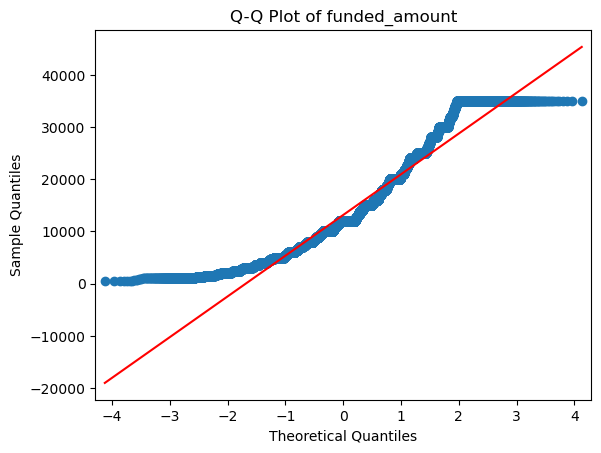

<Figure size 800x600 with 0 Axes>

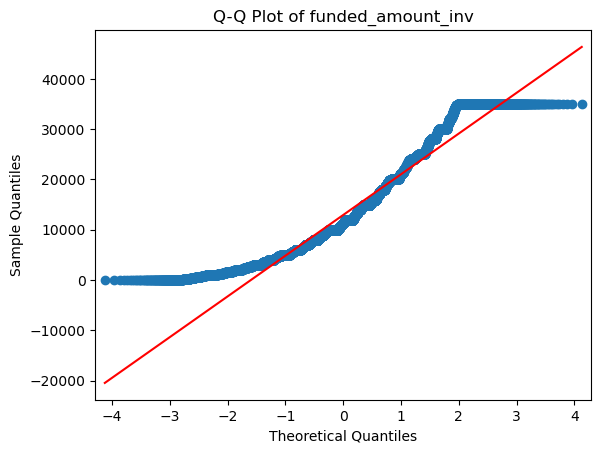

<Figure size 800x600 with 0 Axes>

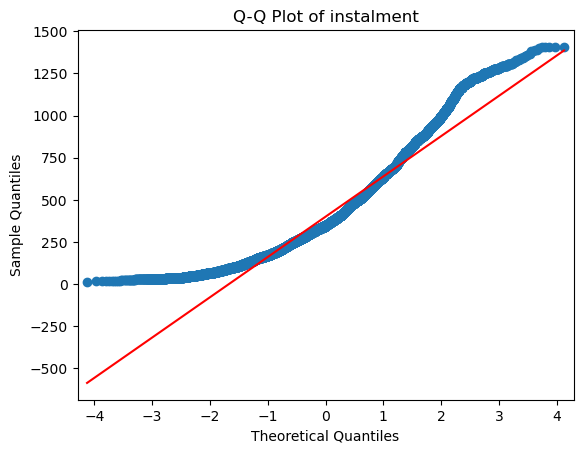

<Figure size 800x600 with 0 Axes>

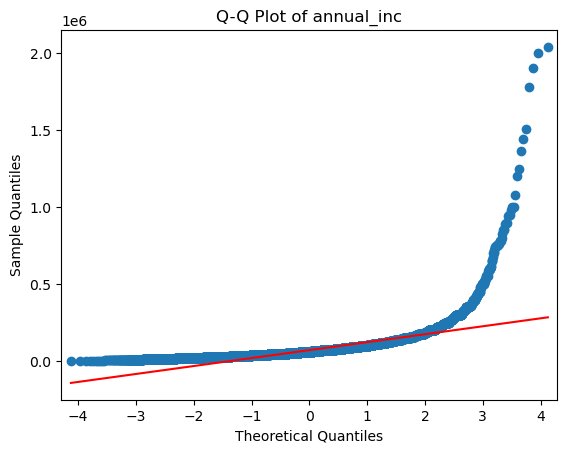

<Figure size 800x600 with 0 Axes>

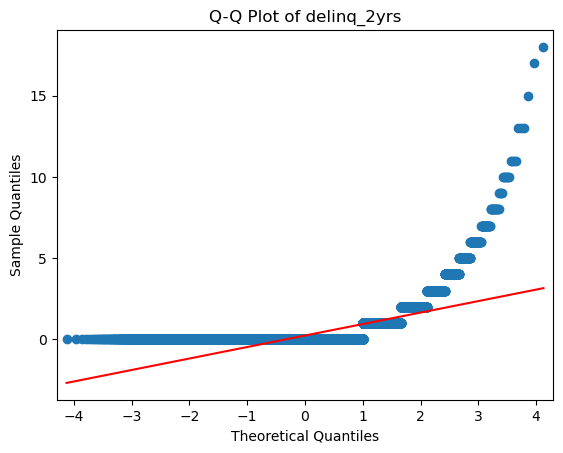

<Figure size 800x600 with 0 Axes>

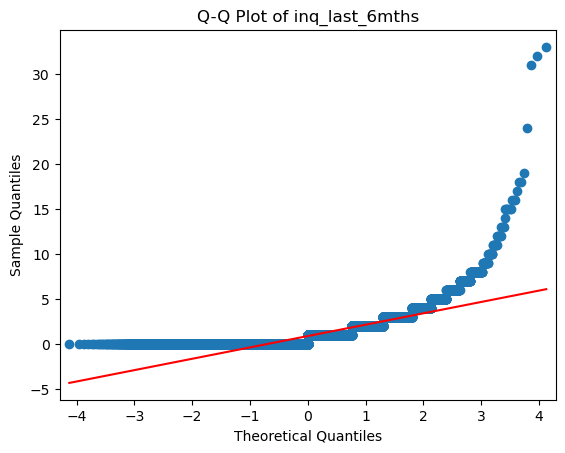

<Figure size 800x600 with 0 Axes>

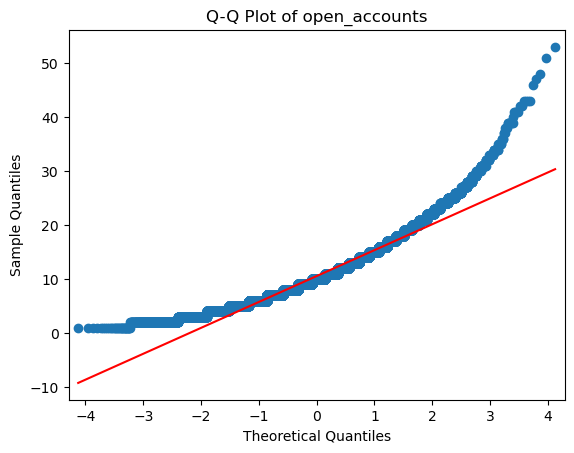

<Figure size 800x600 with 0 Axes>

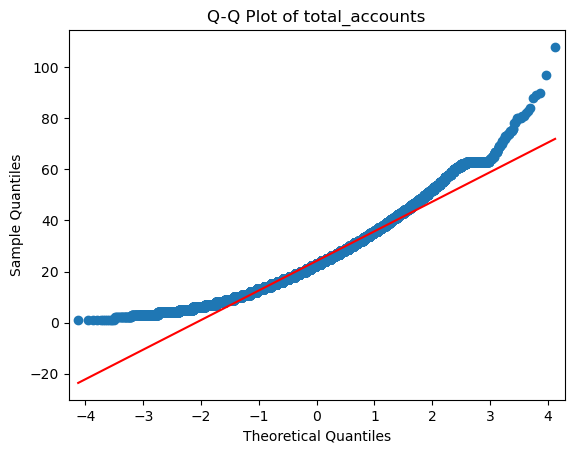

<Figure size 800x600 with 0 Axes>

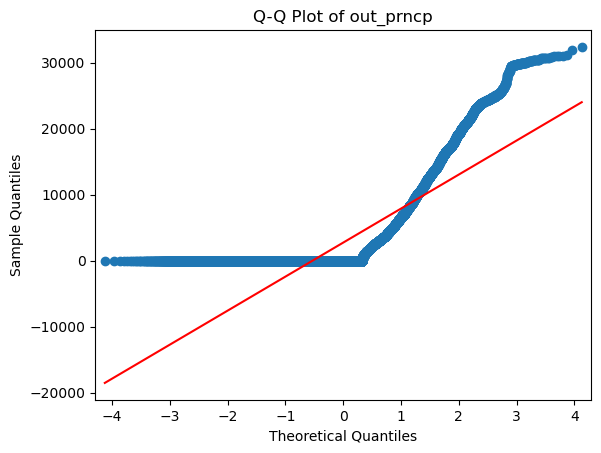

<Figure size 800x600 with 0 Axes>

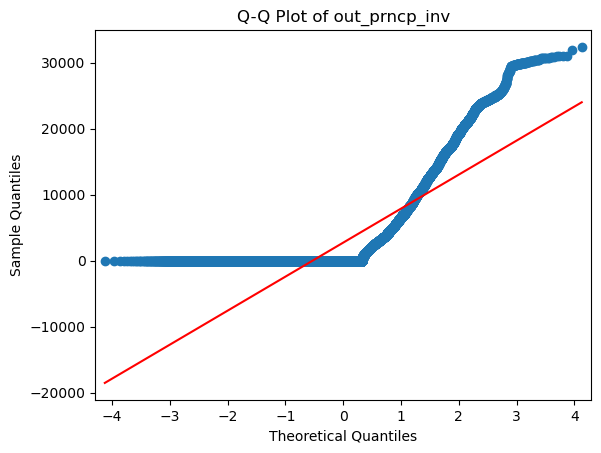

<Figure size 800x600 with 0 Axes>

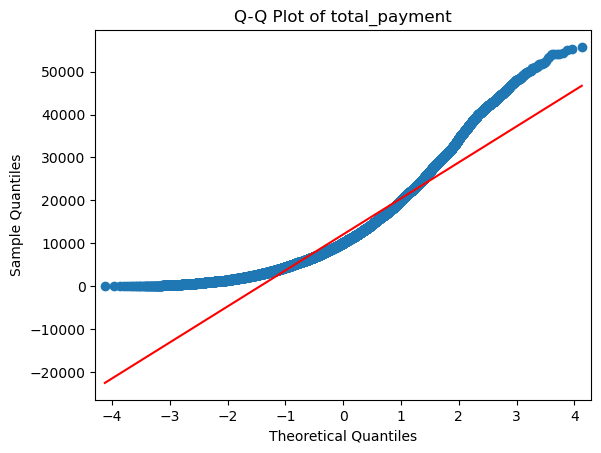

<Figure size 800x600 with 0 Axes>

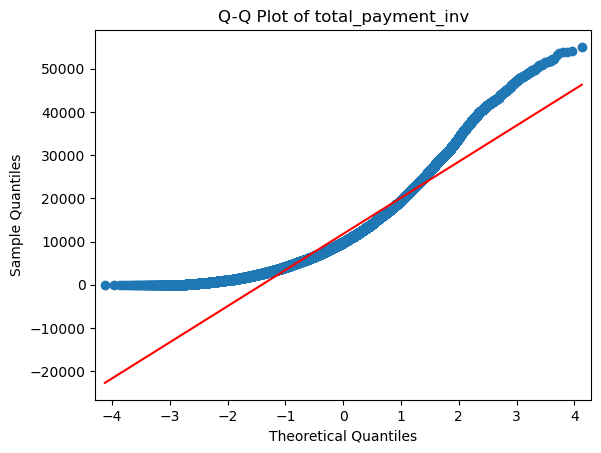

<Figure size 800x600 with 0 Axes>

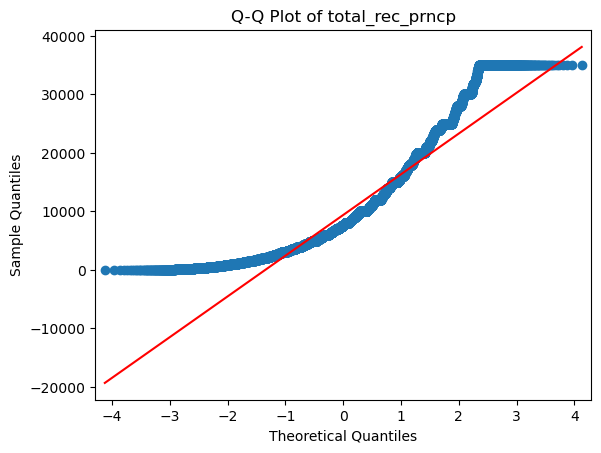

<Figure size 800x600 with 0 Axes>

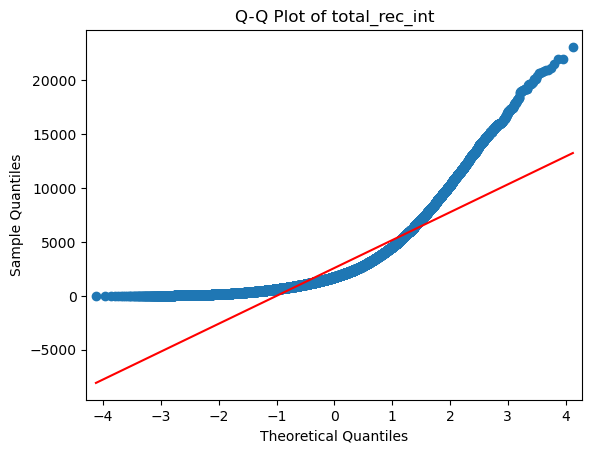

<Figure size 800x600 with 0 Axes>

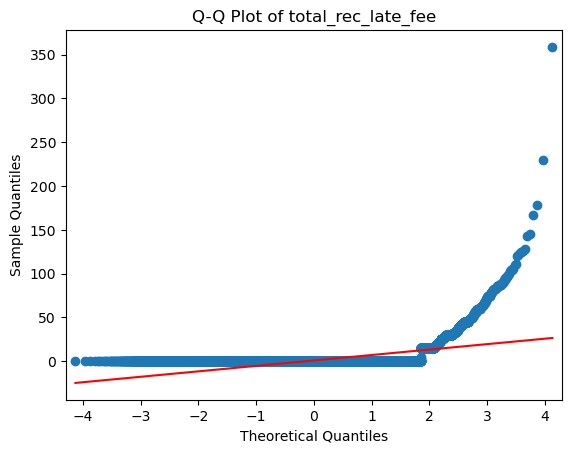

<Figure size 800x600 with 0 Axes>

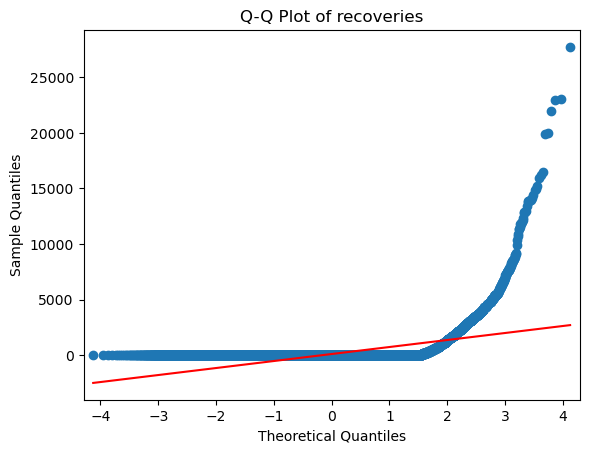

<Figure size 800x600 with 0 Axes>

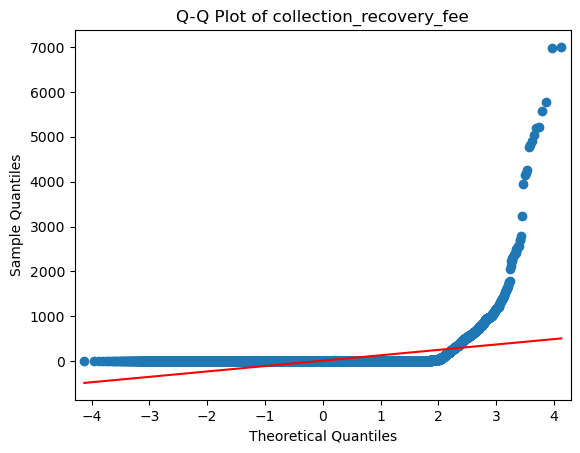

<Figure size 800x600 with 0 Axes>

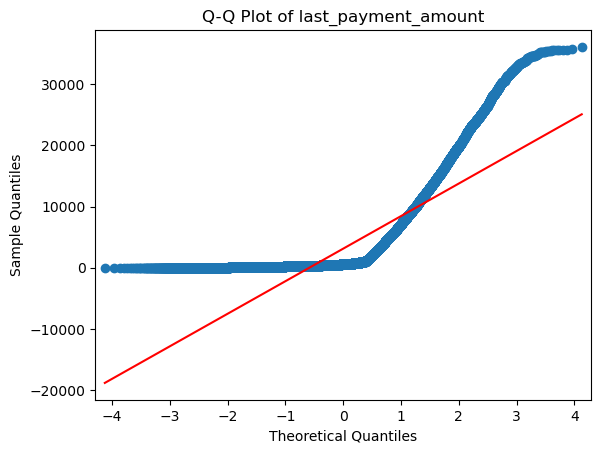

<Figure size 800x600 with 0 Axes>

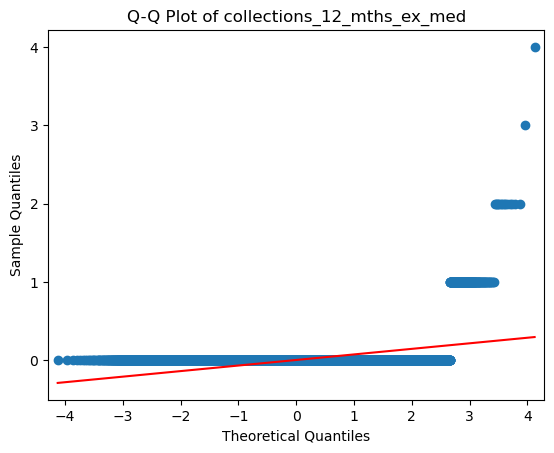

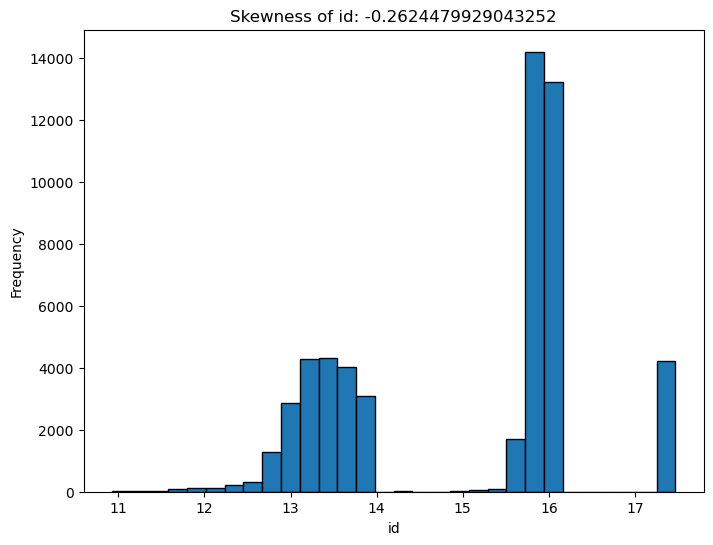

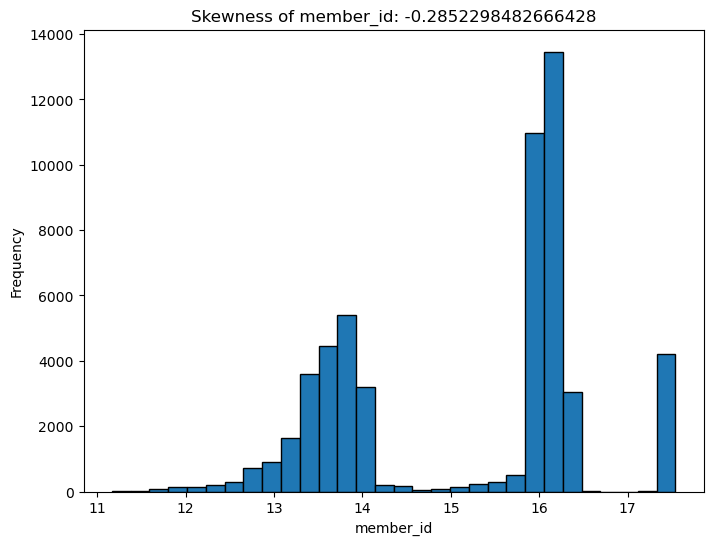

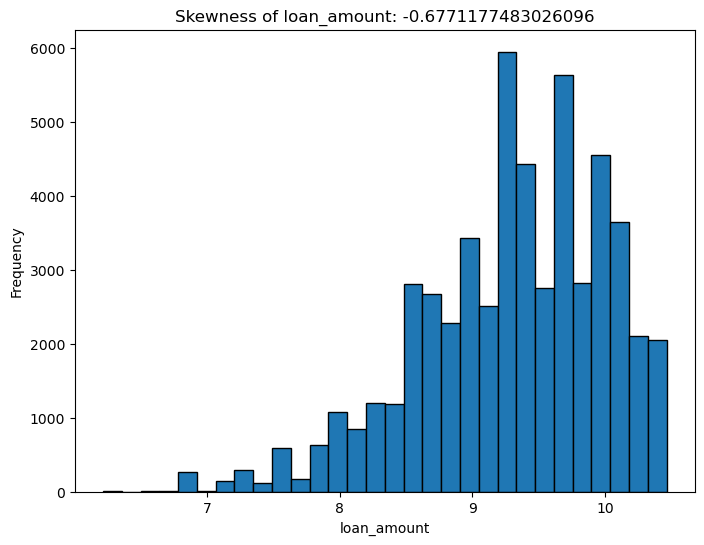

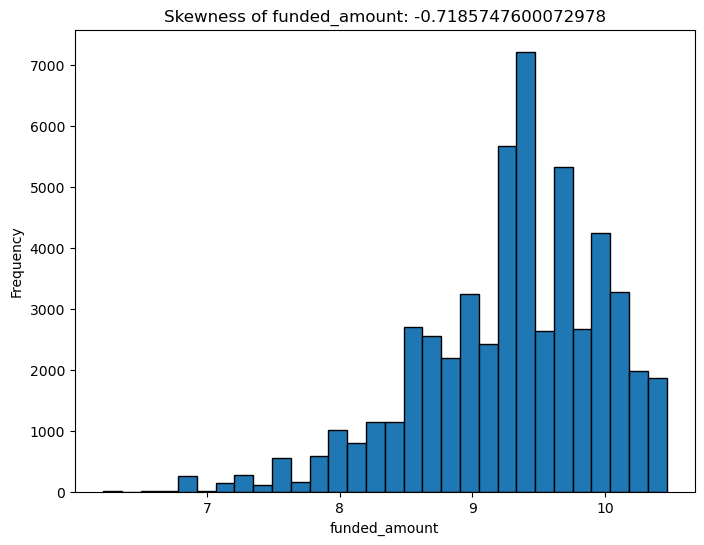

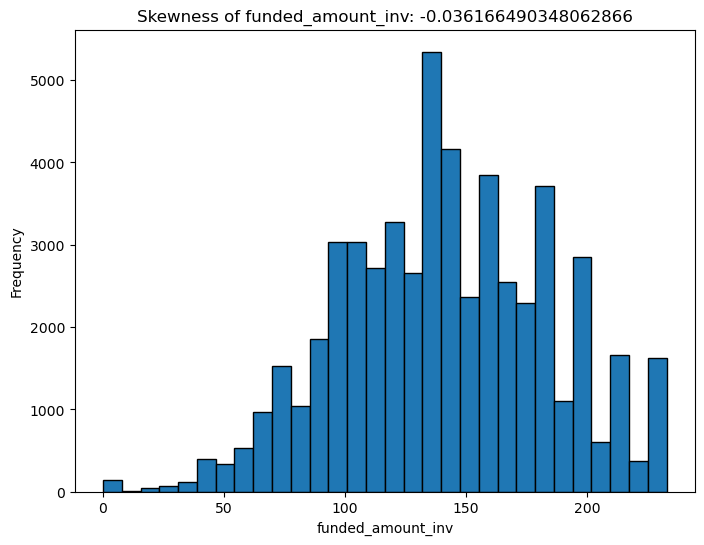

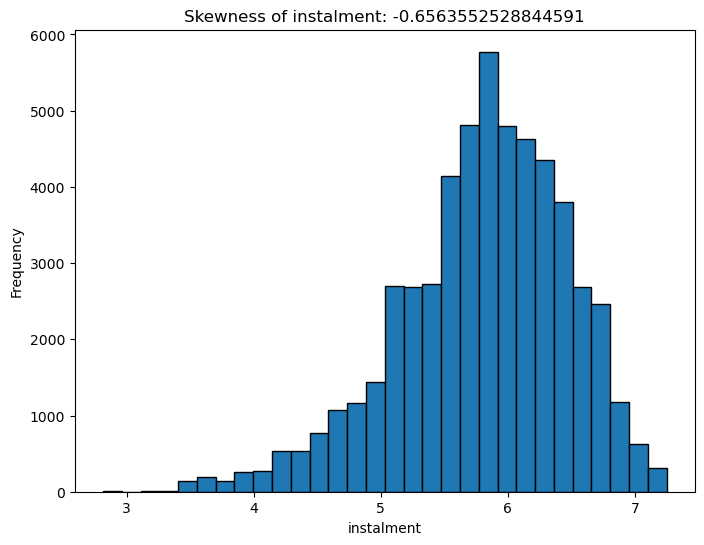

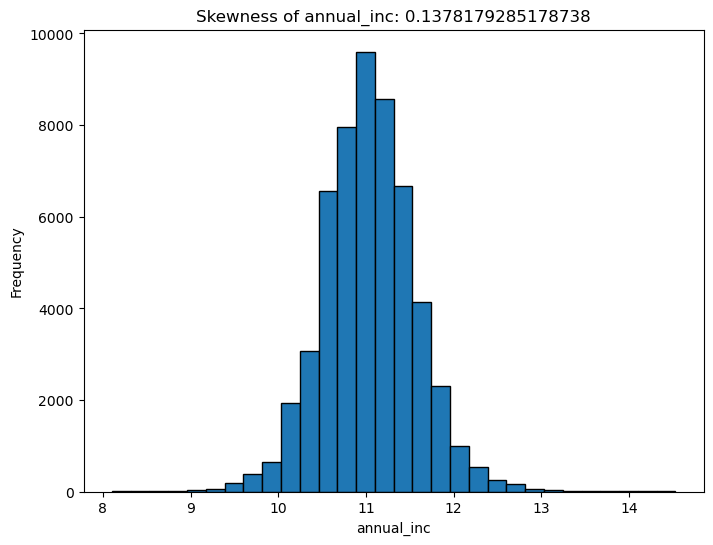

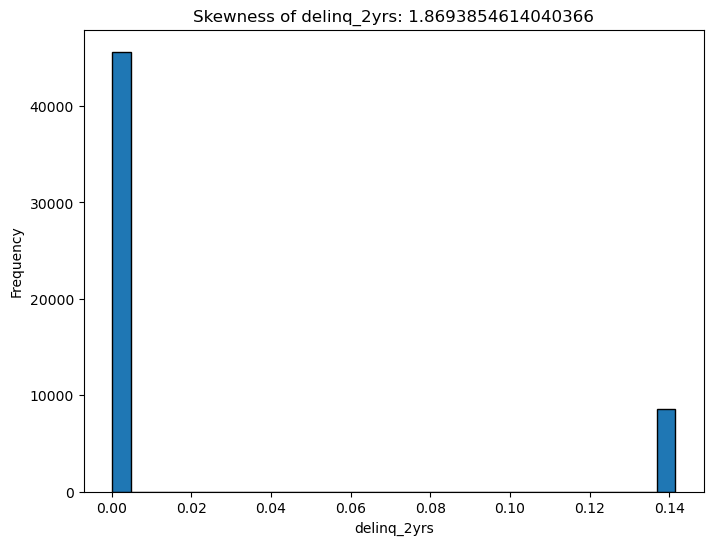

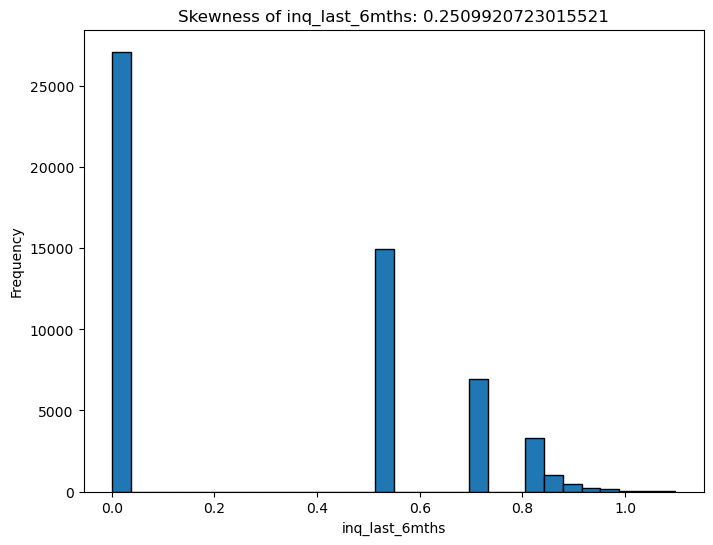

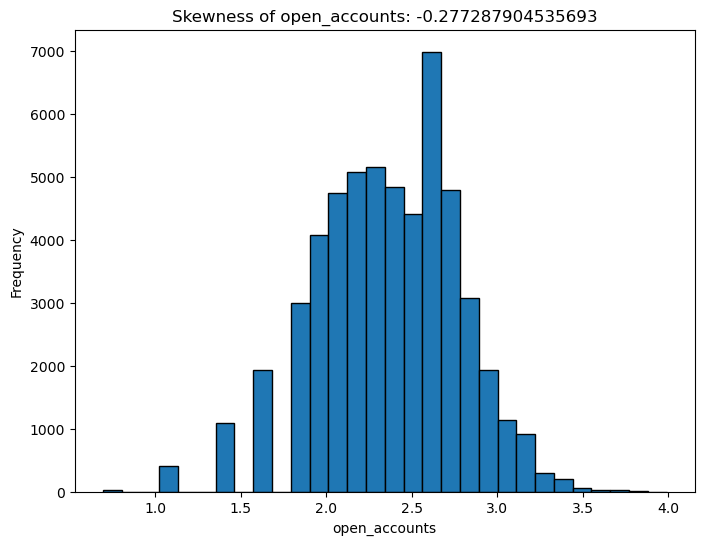

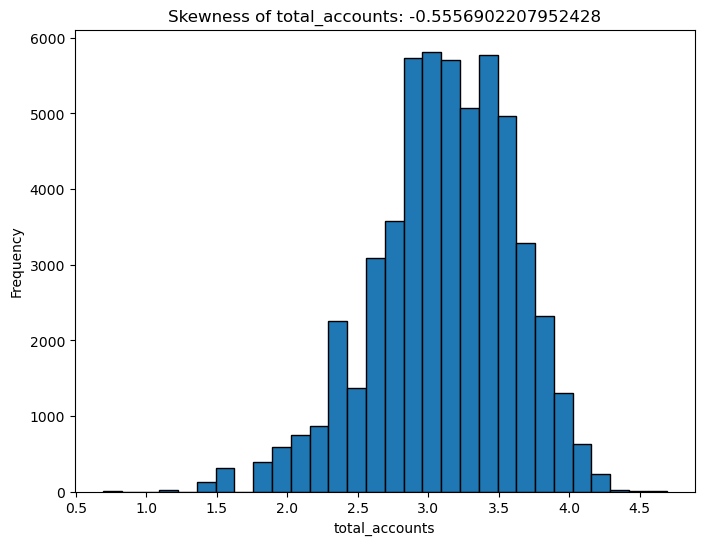

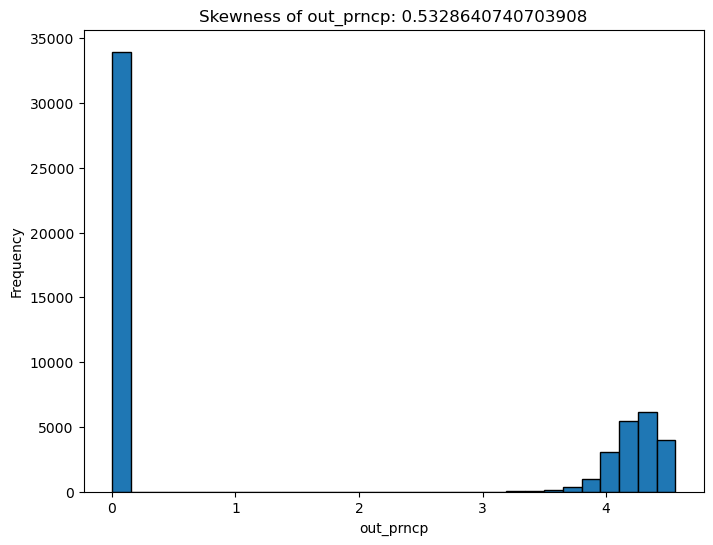

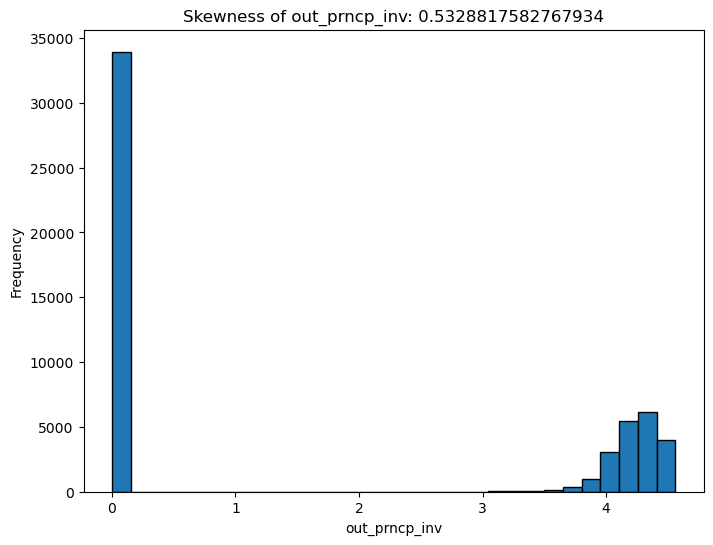

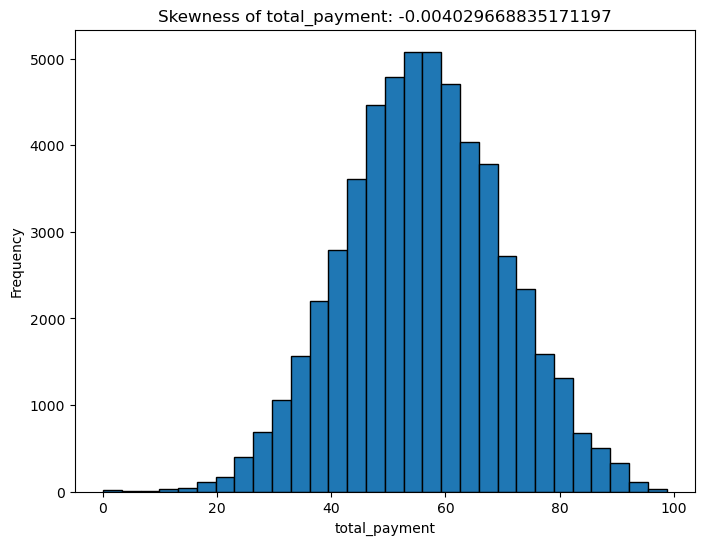

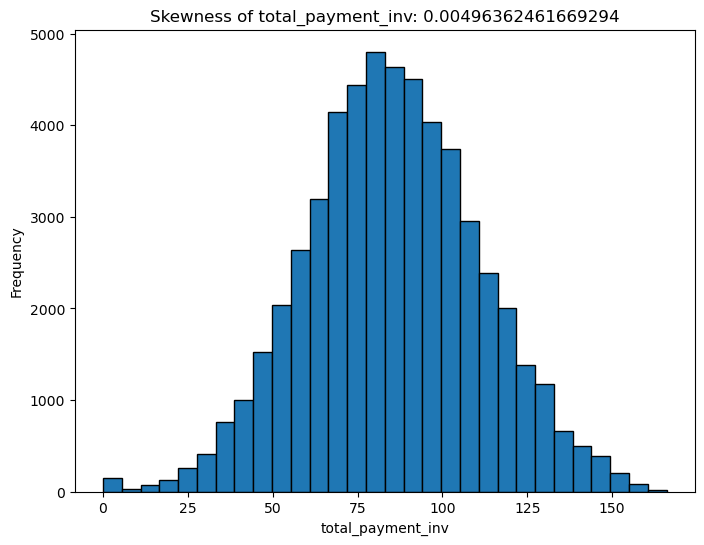

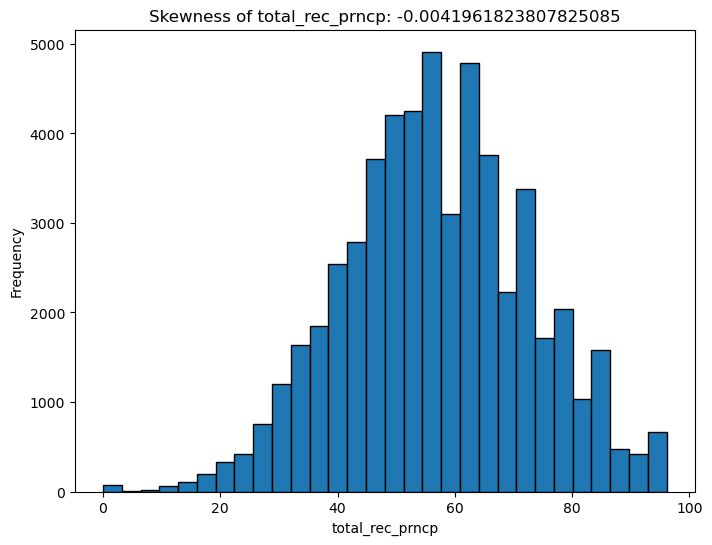

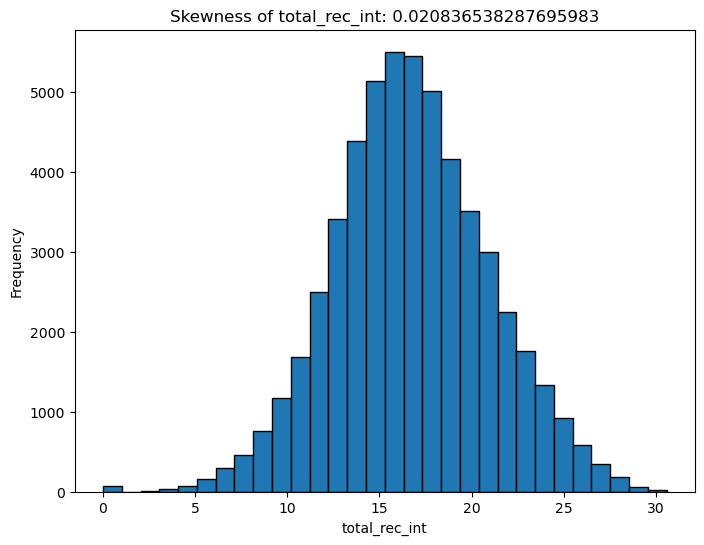

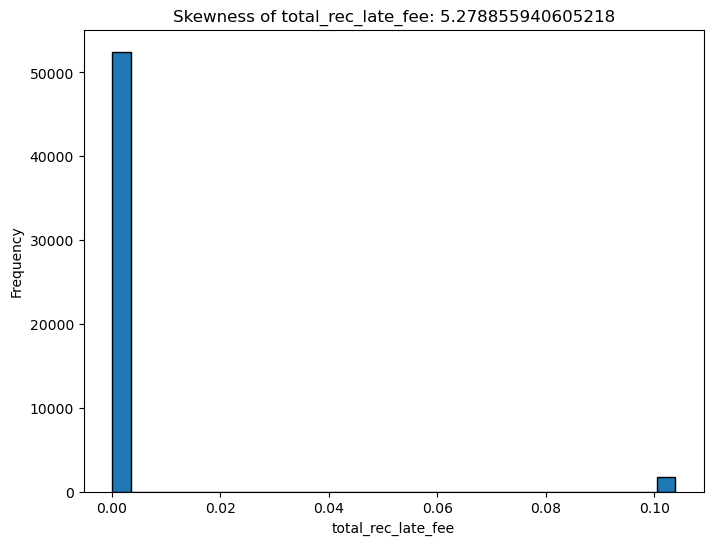

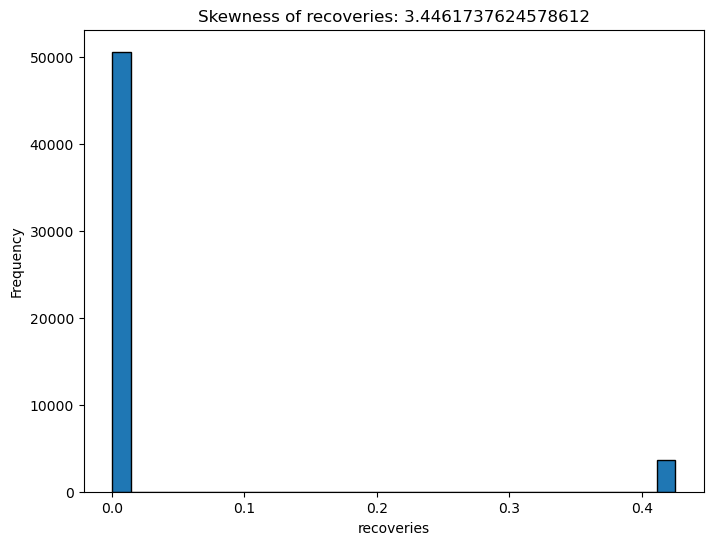

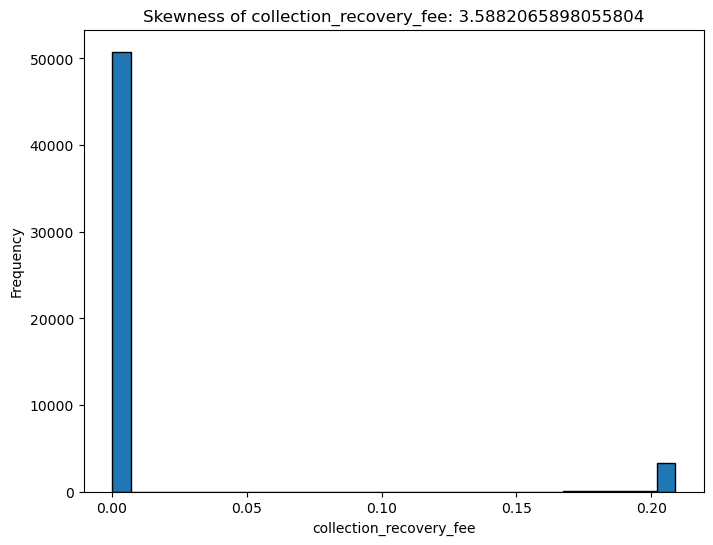

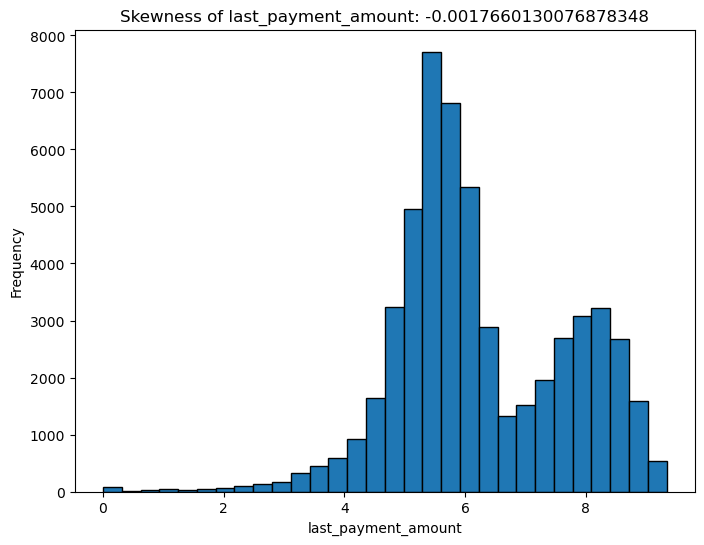

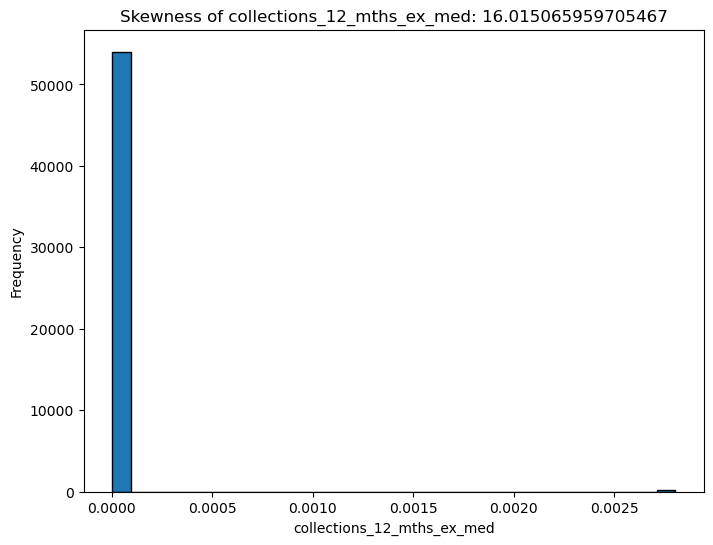

Transformed data saved to: C:/Users/admin/EDA - Customer Loans/transformed_data_after_skew.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox, yeojohnson
import seaborn as sns
import numpy as np
from statsmodels.graphics.gofplots import qqplot

class Plotter:
    @staticmethod
    def plot_histograms(dataframe, columns):
        for col in columns:
            plt.figure(figsize=(8, 6))
            dataframe[col].hist(bins=30, edgecolor='black')
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()

    @staticmethod
    def visualize_skew(dataframe, skewed_columns):
        for col in skewed_columns:
            plt.figure(figsize=(8, 6))
            plt.title(f'Skewness of {col}: {skew(dataframe[col])}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.hist(dataframe[col], bins=30, edgecolor='black')
            plt.show()

    @staticmethod
    def qq_plot(dataframe, columns):
        for col in columns:
            plt.figure(figsize=(8, 6))
            qqplot(dataframe[col], line='s')
            plt.title(f'Q-Q Plot of {col}')
            plt.show()

class DataFrameTransform:
    @staticmethod
    def identify_skewed_columns(dataframe, skew_threshold=0.5):
        numeric_columns = dataframe.select_dtypes(include=['number']).columns
        skewness = dataframe[numeric_columns].apply(lambda x: skew(x.dropna()))
        return skewness[abs(skewness) > skew_threshold].index

    @staticmethod
    def apply_log_transform(dataframe, column):
        dataframe[column] = np.log1p(dataframe[column])
        return dataframe

    @staticmethod
    def apply_boxcox_transform(dataframe, column):
        # Adding a small constant to handle zero values
        dataframe[column], _ = boxcox(dataframe[column] + 1)
        return dataframe

    @staticmethod
    def apply_yeojohnson_transform(dataframe, column):
        dataframe[column], _ = yeojohnson(dataframe[column])
        return dataframe

imputed_data = pd.read_csv('C:/Users/admin/EDA - Customer Loans/imputed_data.csv')

# Create instances of Plotter and DataFrameTransform
plotter = Plotter()
transformer = DataFrameTransform()

# Identify skewed columns and visualize with Q-Q plots
skewed_columns = transformer.identify_skewed_columns(imputed_data)
plotter.qq_plot(imputed_data, skewed_columns)

# Apply transformations and visualize
for col in skewed_columns:
    if imputed_data[col].min() > 0:
        # Apply log transformation for positive values
        imputed_data = transformer.apply_log_transform(imputed_data, col)
    else:
        # Apply Box-Cox transformation for both positive and negative values
        imputed_data = transformer.apply_boxcox_transform(imputed_data, col)

# Visualize the transformed data
plotter.visualize_skew(imputed_data, skewed_columns)

transformed_data_path = 'C:/Users/admin/EDA - Customer Loans/transformed_data_after_skew.csv'
imputed_data.to_csv(transformed_data_path, index=False)
print(f"Transformed data saved to: {transformed_data_path}")